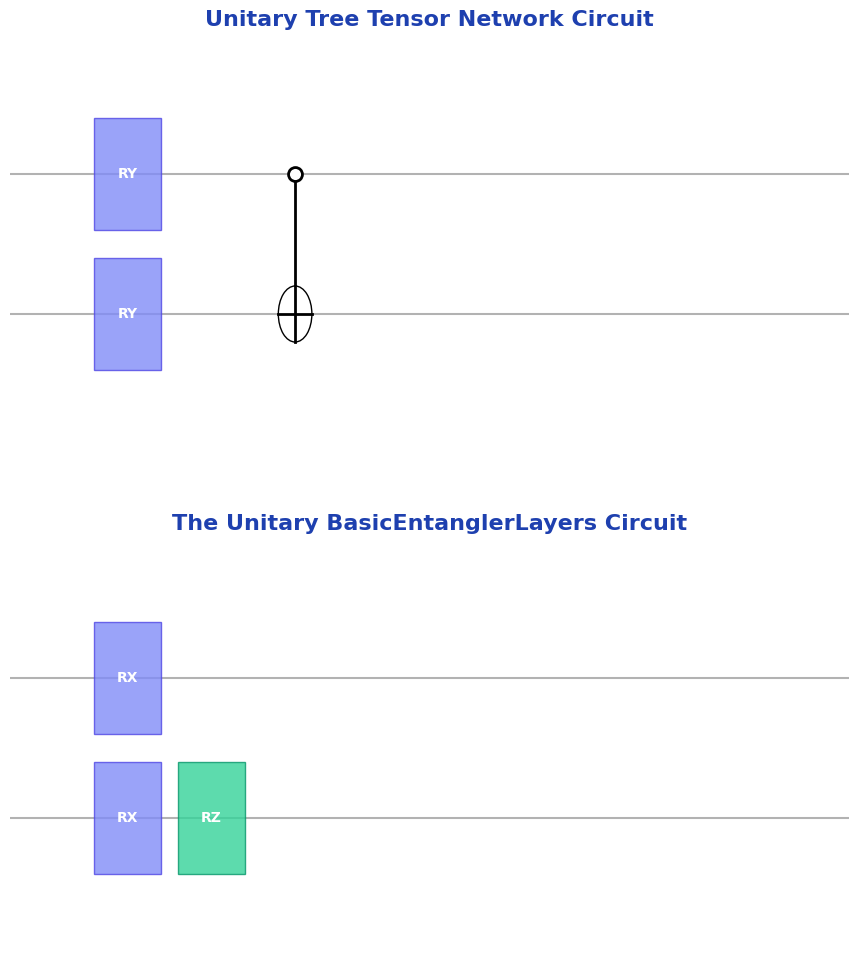

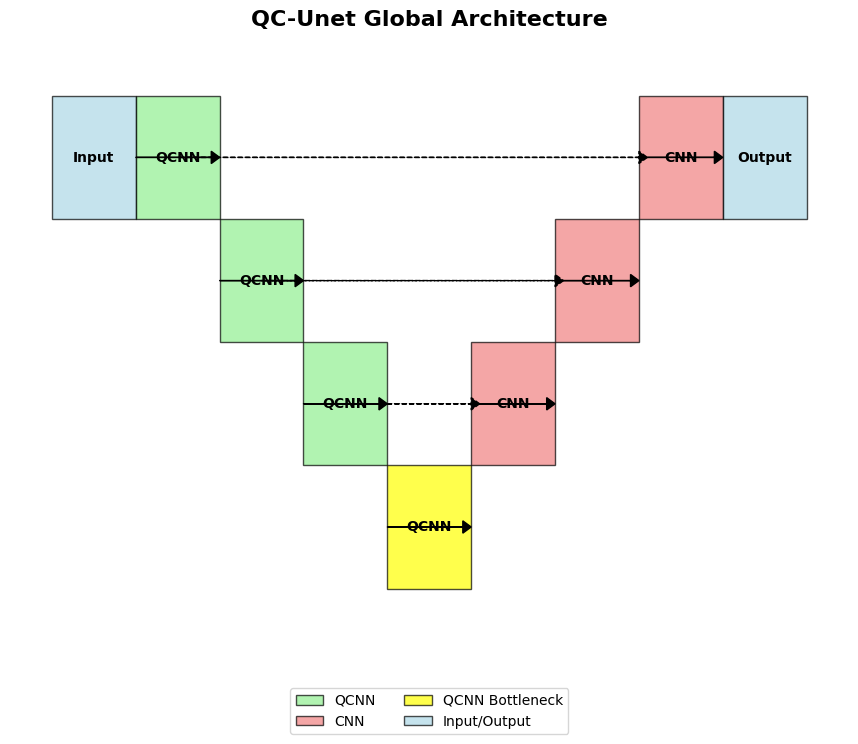

In [1]:
import customtkinter
from tkinter import filedialog
from PIL import Image, ImageTk
import tkintermapview
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.patches import Rectangle, Circle



customtkinter.set_appearance_mode("System")
customtkinter.set_default_color_theme("blue")

class App(customtkinter.CTk):
    def __init__(self):
        super().__init__()

        self.title("QuantaMinds")
        self.geometry(f"{1100}x580")

        self.grid_columnconfigure(1, weight=1)
        self.grid_columnconfigure((2, 3), weight=0)
        self.grid_rowconfigure((0, 1, 2), weight=1)

        # Sidebar
        self.sidebar_frame = customtkinter.CTkFrame(self, width=300, corner_radius=0)
        self.sidebar_frame.grid(row=0, column=0, rowspan=4, sticky="nsew")
        self.sidebar_frame.grid_rowconfigure(5, weight=2)
        

        self.logo_label = customtkinter.CTkLabel(self.sidebar_frame, text="QuantaMinds", font=customtkinter.CTkFont(size=20, weight="bold"))
        self.logo_label.grid(row=0, column=0, padx=20, pady=(20, 10))

        self.main_page_button = customtkinter.CTkButton(self.sidebar_frame, text="Main Page", command=self.show_main_page)
        self.main_page_button.grid(row=1, column=0, padx=20, pady=(10, 20))

        self.circuit_button = customtkinter.CTkButton(self.sidebar_frame, text="Circuit Animations", command=self.show_circuit_animation)
        self.circuit_button.grid(row=2, column=0, padx=20, pady=(10, 20))

        self.qcunet_button = customtkinter.CTkButton(self.sidebar_frame, text="QC-Unet Architecture", command=self.show_qcunet_architecture)
        self.qcunet_button.grid(row=3, column=0, padx=20, pady=(10, 20))

        # Main content area
        self.main_frame = customtkinter.CTkFrame(self)
        self.main_frame.grid(row=0, column=1, columnspan=3, rowspan=4, sticky="nsew")
        self.main_frame.grid_columnconfigure(0, weight=1)
        self.main_frame.grid_rowconfigure(0, weight=1)

        # Main page content
        self.main_page = customtkinter.CTkFrame(self.main_frame)
        self.main_page.grid(row=0, column=0, sticky="nsew")

        self.textbox = customtkinter.CTkTextbox(self.main_page, width=250)
        self.textbox.pack(fill="both", expand=True, padx=20, pady=20)

        self.map_widget = tkintermapview.TkinterMapView(self.main_page, width=400, height=300, corner_radius=0)
        self.map_widget.pack(fill="both", expand=True, padx=20, pady=20)

        self.upload_button = customtkinter.CTkButton(self.main_page, text="Upload File", command=self.upload_file)
        self.upload_button.pack(pady=20)

        


        self.appearance_mode_label = customtkinter.CTkLabel(self.sidebar_frame, text="Appearance Mode:", anchor="w")
        self.appearance_mode_label.grid(row=5, column=0, padx=20, pady=(10, 0))
        self.appearance_mode_optionemenu = customtkinter.CTkOptionMenu(self.sidebar_frame, values=["Light", "Dark", "System"],
                                        command=self.change_appearance_mode_event)
        self.appearance_mode_optionemenu.grid(row=6, column=0, padx=20, pady=(10, 10))
        self.scaling_label = customtkinter.CTkLabel(self.sidebar_frame, text="UI Scaling:", anchor="w")
        self.scaling_label.grid(row=7, column=0, padx=20, pady=(10, 0))
        self.scaling_optionemenu = customtkinter.CTkOptionMenu(self.sidebar_frame, values=["80%", "90%", "100%", "110%", "120%"],
                                    command=self.change_scaling_event)
        self.scaling_optionemenu.grid(row=8, column=0, padx=20, pady=(10, 20))

        # Circuit animation page
        self.circuit_page = customtkinter.CTkFrame(self.main_frame)
        self.circuit_page.grid(row=0, column=0, sticky="nsew")
        self.circuit_page.grid_remove()

        #scrollable frame for the circuit page
        self.circuit_scroll_frame = customtkinter.CTkScrollableFrame(self.circuit_page)
        self.circuit_scroll_frame.pack(fill="both", expand=True)

        # circuit animations
        self.circuit_label = customtkinter.CTkLabel(self.circuit_scroll_frame, text="Unitary Circuit Animations", font=customtkinter.CTkFont(size=16, weight="bold"))
        self.circuit_label.pack(pady=(20, 10))

        # preprocessing steps
        self.preprocessing_frame = customtkinter.CTkFrame(self.circuit_scroll_frame)
        self.preprocessing_frame.pack(fill='x', padx=20, pady=10)

        self.preprocessing_label = customtkinter.CTkLabel(self.preprocessing_frame, text="Preprocessing Steps:", font=customtkinter.CTkFont(size=14, weight="bold"))
        self.preprocessing_label.pack(anchor='w', pady=(5, 10))

        steps = ["1. Normalization", "2. Cropping", "3. Randomization", "4. Tensor Conversion"]
        self.step_labels = []
        
        for step in steps:
            step_label = customtkinter.CTkLabel(self.preprocessing_frame, text=step, font=customtkinter.CTkFont(size=12))
            step_label.pack(anchor='w', padx=20)
            self.step_labels.append(step_label)

        self.timeline = customtkinter.CTkProgressBar(self.preprocessing_frame, orientation="horizontal", mode="determinate")
        self.timeline.pack(fill='x', padx=20, pady=(10, 5))
        self.timeline.set(0)

        self.fig, (self.ax1, self.ax2) = plt.subplots(2, 1, figsize=(12, 12))
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.circuit_scroll_frame)
        self.canvas_widget = self.canvas.get_tk_widget()
        self.canvas_widget.pack(fill='x', padx=20, pady=10)

        # QC-Unet Architecture page
        self.qcunet_page = customtkinter.CTkFrame(self.main_frame)
        self.qcunet_page.grid(row=0, column=0, sticky="nsew")
        self.qcunet_page.grid_remove()

        self.qcunet_scroll_frame = customtkinter.CTkScrollableFrame(self.qcunet_page)
        self.qcunet_scroll_frame.pack(fill="both", expand=True)

        self.qcunet_label = customtkinter.CTkLabel(self.qcunet_scroll_frame, text="QC-Unet Global Architecture", font=customtkinter.CTkFont(size=20, weight="bold"))
        self.qcunet_label.pack(pady=(20, 10))

        self.qcunet_description = customtkinter.CTkTextbox(self.qcunet_scroll_frame, height=200)
        self.qcunet_description.pack(fill="x", padx=20, pady=10)
        self.qcunet_description.insert("0.0", """
Introducing a Hybrid Quantum-Classical U-net architecture that enhances traditional U-net models by integrating quantum convolutional layers. This hybrid model retains the classical U-net structure while incorporating Quantum Convolutional Neural Networks (QCNN) in critical stages: Input Convolution, Encoder, and Bottleneck. By replacing select CNN layers with QCNNs, we aim to leverage quantum computing's unique capabilities, such as encoding data into higher-dimensional spaces, superior feature extraction through quantum entanglement, and faster data processing via quantum parallelism. Our approach uses two types of quantum convolutional layers, Quanv 2x2 and Quanv 3x3, for refined and extensive feature extraction.

Advantages of replacing CNN with QCNN:
• Input Convolution Layer: QCNNs can encode input data into higher-dimensional Hilbert spaces, potentially capturing more intricate patterns and features.
• Encoder: QCNNs offer superior feature extraction through quantum entanglement and superposition, leading to more efficient encoding of complex data structures.
• Bottleneck: QCNNs can process multiple data points simultaneously due to quantum parallelism, potentially leading to faster and more efficient information compression.

We employ two types of quantum convolutional layers:
• Quanv 2x2: Uses a 2x2 window (4 qubits), allowing for finer granularity in feature extraction.
• Quanv 3x3: Uses a 3x3 window (9 qubits), enabling the capture of more extensive features and broader contextual information.
        """)

        self.qcunet_fig, self.qcunet_ax = plt.subplots(figsize=(12, 8))
        self.qcunet_canvas = FigureCanvasTkAgg(self.qcunet_fig, master=self.qcunet_scroll_frame)
        self.qcunet_canvas_widget = self.qcunet_canvas.get_tk_widget()
        self.qcunet_canvas_widget.pack(fill='x', padx=20, pady=10)

        # main page content
        self.init_main_page_content()

    def init_main_page_content(self):
        self.textbox.insert("0.0", """Methane Leaks Detetction Project 

Explore our groundbreaking research on methane leak detection in Algeria, Turkmenistan, and the USA. 
We've developed the world's first Quantum U-Net hybrid model for this purpose, revolutionizing environmental monitoring.
Our innovative approach combines quantum computing with advanced neural networks, setting a new standard in the field of methane detection.
""")
        self.add_map_markers()

    def show_main_page(self):
        self.circuit_page.grid_remove()
        self.qcunet_page.grid_remove()
        self.main_page.grid()
        
    def change_appearance_mode_event(self, new_appearance_mode: str):
        customtkinter.set_appearance_mode(new_appearance_mode)

    def change_scaling_event(self, new_scaling: str):
        new_scaling_float = int(new_scaling.replace("%", "")) / 100
        customtkinter.set_widget_scaling(new_scaling_float)

    def show_circuit_animation(self):
        self.main_page.grid_remove()
        self.qcunet_page.grid_remove()
        self.circuit_page.grid()
        self.animate_circuit()

    def show_qcunet_architecture(self):
        self.main_page.grid_remove()
        self.circuit_page.grid_remove()
        self.qcunet_page.grid()
        self.draw_qcunet_architecture()

    def add_map_markers(self):
        self.map_widget.set_position(0, 0)
        self.map_widget.set_zoom(1)
        self.map_widget.set_marker(28.0339, 1.6596, text="Algeria")
        self.map_widget.set_marker(38.9697, 59.5563, text="Turkmenistan")
        self.map_widget.set_marker(37.0902, -95.7129, text="USA")

    def upload_file(self):
        file_path = filedialog.askopenfilename()
        if file_path:
            print("File uploaded successfully:", file_path)

    def animate_circuit(self):
        self.ax1.clear()
        self.ax2.clear()
        self.ax1.set_xlim(0, 10)
        self.ax1.set_ylim(0, 3)
        self.ax2.set_xlim(0, 10)
        self.ax2.set_ylim(0, 3)
        self.ax1.axis('off')
        self.ax2.axis('off')

        def animate(frame):
            self.ax1.clear()
            self.ax2.clear()
            self.ax1.set_xlim(0, 10)
            self.ax1.set_ylim(0, 3)
            self.ax2.set_xlim(0, 10)
            self.ax2.set_ylim(0, 3)
            self.ax1.axis('off')
            self.ax2.axis('off')
            
            # qubit lines
            for ax in [self.ax1, self.ax2]:
                ax.plot([0, 10], [1, 1], 'k-', alpha=0.3)
                ax.plot([0, 10], [2, 2], 'k-', alpha=0.3)
            
            # titles
            self.ax1.set_title("Unitary Tree Tensor Network Circuit", fontsize=16, fontweight='bold', color='#1E40AF')
            self.ax2.set_title("The Unitary BasicEntanglerLayers Circuit", fontsize=16, fontweight='bold', color='#1E40AF')

            # U_TTN Circuit
            if frame >= 1:
                self.draw_gate(self.ax1, 1, 1, 'RY', '#818CF8', '#4F46E5')
            if frame >= 2:
                self.draw_gate(self.ax1, 1, 2, 'RY', '#818CF8', '#4F46E5')
            if frame >= 3:
                self.draw_cnot(self.ax1, 3, '#FBBF24', '#D97706')

            # U_5 Circuit
            gates = ['RX', 'RX', 'RZ', 'RZ', 'CRZ', 'CRZ', 'RX', 'RX', 'RZ', 'RZ']
            positions = [(1, 1), (1, 2), (2, 1), (2, 2), (3, 1), (4, 1), (5, 1), (5, 2), (6, 1), (6, 2)]
            colors = ['#818CF8', '#818CF8', '#34D399', '#34D399', '#FBBF24', '#FBBF24', 
                      '#818CF8', '#818CF8', '#34D399', '#34D399']
            edge_colors = ['#4F46E5', '#4F46E5', '#059669', '#059669', '#D97706', '#D97706', 
                           '#4F46E5', '#4F46E5', '#059669', '#059669']

            for i, (gate, pos, color, edge_color) in enumerate(zip(gates, positions, colors, edge_colors)):
                if frame > i + 3:  # +3 to start after U_TTN animation
                    if gate == 'CRZ':
                        self.draw_crz(self.ax2, pos[0], color, edge_color)
                    else:
                        self.draw_gate(self.ax2, pos[0], pos[1], gate, color, edge_color)
            '''
            def draw_angular_embedding(self, ax, x, y, theta1, theta2):
                ax.plot([x + 0.4, x + 0.6], [y - 0.1, y - 0.1], 'k-', linewidth=2)
                ax.plot([x + 0.4, x + 0.4], [y - 0.1, y + 0.1], 'k-', linewidth=2)
                ax.plot([x + 0.6, x + 0.6], [y - 0.1, y + 0.1], 'k-', linewidth=2)
                ax.text(x + 0.5, y - 0.25, f"RY({theta1:.2f})", ha='center', va='center', fontsize=10, color='#4F46E5')
                ax.text(x + 0.5, y + 0.25, f"RY({theta2:.2f})", ha='center', va='center', fontsize=10, color='#4F46E5')
            '''
            
            

        self.anim = animation.FuncAnimation(self.fig, animate, frames=15, interval=1000, repeat=True)
        self.canvas.draw()
        
        

    
        
        
        def animate(frame):
            # Update preprocessing timeline
            if frame < 4:
                self.timeline.set((frame + 1) / 4)
                for i, label in enumerate(self.step_labels):
                    if i == frame:
                        label.configure(text_color="green")
                    else:
                        label.configure(text_color="black")

            

        self.anim = animation.FuncAnimation(self.fig, animate, frames=15, interval=1000, repeat=True)
        self.canvas.draw()

    def draw_gate(self, ax, x, y, label, face_color, edge_color):
        rect = Rectangle((x, y - 0.4), 0.8, 0.8, facecolor=face_color, edgecolor=edge_color, alpha=0.8, zorder=2)
        ax.add_patch(rect)
        ax.text(x + 0.4, y, label, ha='center', va='center', fontweight='bold', color='white', zorder=3)

    def draw_cnot(self, ax, x, face_color, edge_color):
        # Control qubit
        ax.plot([x + 0.4, x + 0.4], [2, 1], 'k-', linewidth=2)
        ax.plot(x + 0.4, 2, 'ko', markersize=10, markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)
        
        # Target qubit
        circle = Circle((x + 0.4, 1), 0.2, facecolor='white', edgecolor='black', zorder=2)
        ax.add_patch(circle)
        ax.plot([x + 0.2, x + 0.6], [1, 1], 'k-', linewidth=2)
        ax.plot([x + 0.4, x + 0.4], [0.8, 1.2], 'k-', linewidth=2)

    def draw_crz(self, ax, x, face_color, edge_color):
        # Control qubit
        ax.plot([x + 0.4, x + 0.4], [2, 1], 'k-', linewidth=2)
        ax.plot(x + 0.4, 2, 'ko', markersize=10, markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)
        
        # Target qubit
        rect = Rectangle((x, 0.6), 0.8, 0.8, facecolor=face_color, edgecolor=edge_color, alpha=0.8, zorder=2)
        ax.add_patch(rect)
        ax.text(x + 0.4, 1, 'RZ', ha='center', va='center', fontweight='bold', color='white', zorder=3)

    def draw_qcunet_architecture(self):
        self.qcunet_ax.clear()
        self.qcunet_ax.axis('off')

        # Draw U-net structure
        def draw_block(x, y, width, height, label, color):
            rect = Rectangle((x, y), width, height, facecolor=color, edgecolor='black', alpha=0.7)
            self.qcunet_ax.add_patch(rect)
            self.qcunet_ax.text(x + width/2, y + height/2, label, ha='center', va='center', fontweight='bold')

        # Input
        draw_block(0, 4, 1, 1, 'Input', 'lightblue')

        # Encoder
        draw_block(1, 4, 1, 1, 'QCNN', 'lightgreen')
        draw_block(2, 3, 1, 1, 'QCNN', 'lightgreen')
        draw_block(3, 2, 1, 1, 'QCNN', 'lightgreen')

        # Bottleneck
        draw_block(4, 1, 1, 1, 'QCNN', 'yellow')

        # Decoder
        draw_block(5, 2, 1, 1, 'CNN', 'lightcoral')
        draw_block(6, 3, 1, 1, 'CNN', 'lightcoral')
        draw_block(7, 4, 1, 1, 'CNN', 'lightcoral')

        # Output
        draw_block(8, 4, 1, 1, 'Output', 'lightblue')

        # Arrows
        self.qcunet_ax.arrow(1, 4.5, 0.9, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
        self.qcunet_ax.arrow(2, 3.5, 0.9, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
        self.qcunet_ax.arrow(3, 2.5, 0.9, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
        self.qcunet_ax.arrow(4, 1.5, 0.9, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
        self.qcunet_ax.arrow(5, 2.5, 0.9, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
        self.qcunet_ax.arrow(6, 3.5, 0.9, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
        self.qcunet_ax.arrow(7, 4.5, 0.9, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')

        # Skip connections
        self.qcunet_ax.arrow(1.5, 4.5, 5.5, 0, head_width=0.1, head_length=0.1, fc='k', ec='k', linestyle='--')
        self.qcunet_ax.arrow(2.5, 3.5, 3.5, 0, head_width=0.1, head_length=0.1, fc='k', ec='k', linestyle='--')
        self.qcunet_ax.arrow(3.5, 2.5, 1.5, 0, head_width=0.1, head_length=0.1, fc='k', ec='k', linestyle='--')

        self.qcunet_ax.set_xlim(-0.5, 9.5)
        self.qcunet_ax.set_ylim(0.5, 5.5)
        self.qcunet_ax.set_title('QC-Unet Global Architecture', fontsize=16, fontweight='bold')

        # Legend
        legend_elements = [
            Rectangle((0, 0), 1, 1, facecolor='lightgreen', edgecolor='black', alpha=0.7, label='QCNN'),
            Rectangle((0, 0), 1, 1, facecolor='lightcoral', edgecolor='black', alpha=0.7, label='CNN'),
            Rectangle((0, 0), 1, 1, facecolor='yellow', edgecolor='black', alpha=0.7, label='QCNN Bottleneck'),
            Rectangle((0, 0), 1, 1, facecolor='lightblue', edgecolor='black', alpha=0.7, label='Input/Output')
        ]
        self.qcunet_ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

        self.qcunet_canvas.draw()


if __name__ == "__main__":
    app = App()
    app.mainloop()